In [1]:
#all imports needed known
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from scipy.special import softmax

In [2]:
commentsdf = pd.read_csv('YoutubeCommentsDataSet.csv')
commentsdf.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [3]:
#just wanted to see the first comment because it being neutral was an interesting comment
commentsdf['Comment'].values[0]

'lets not forget that apple pay in 2014 required a brand new iphone in order to use it a significant portion of apples user base wasnt able to use it even if they wanted to as each successive iphone incorporated the technology and older iphones were replaced the number of people who could use the technology increased'

In [4]:
#check if nulls
commentsdf.isnull()
#drop said nulls, they're of no use here
commentsdf = commentsdf.dropna()
#double check
commentsdf.isnull().sum()

Comment      0
Sentiment    0
dtype: int64

In [5]:
#check if duplicate
commentsdf.duplicated().sum()
#drop the dupes
commentsdf = commentsdf.drop_duplicates()
#double check
commentsdf.duplicated().sum()

0

In [6]:
print(len(commentsdf))
commentsdf.index = range(0, len(commentsdf))
commentsdf['Index'] = commentsdf.index
commentsdf = commentsdf[['Index', 'Comment', 'Sentiment']]
commentsdf

17874


,Index,Comment,Sentiment
0,0,lets not forget that apple pay in 2014 require...,neutral
1,1,here in nz 50 of retailers don’t even have con...,negative
2,2,i will forever acknowledge this channel with t...,positive
3,3,whenever i go to a place that doesn’t take app...,negative
4,4,apple pay is so convenient secure and easy to ...,positive
...,...,...,...
17869,17869,i really like the point about engineering tool...,positive
17870,17870,i’ve just started exploring this field and thi...,positive
17871,17871,excelente video con una pregunta filosófica pr...,neutral
17872,17872,hey daniel just discovered your channel a coup...,positive


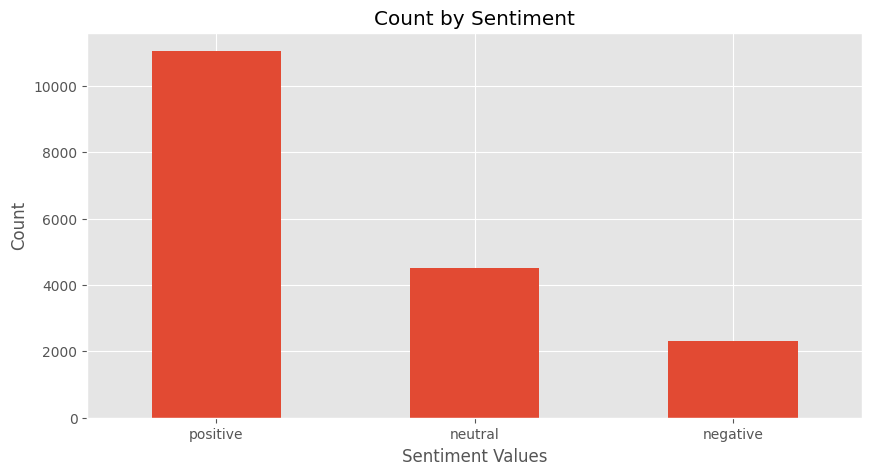

In [7]:
axis = commentsdf['Sentiment'].value_counts().plot(kind='bar' , title='Count by Sentiment', figsize=(10,5))
axis.set_xlabel('Sentiment Values')
axis.set_ylabel('Count')
axis.tick_params(axis='x', labelrotation=0)
plt.show()

In [9]:
sia = SentimentIntensityAnalyzer()
res = {}
for i, row in tqdm(commentsdf.iterrows(), total = len(commentsdf)):
    text = row['Comment']
    theID = row['Index']
    res[theID] = sia.polarity_scores(text)

res

  0%|          | 0/17874 [00:00<?, ?it/s]

{0: {'neg': 0.024, 'neu': 0.825, 'pos': 0.151, 'compound': 0.6774},
 1: {'neg': 0.039, 'neu': 0.672, 'pos': 0.289, 'compound': 0.836},
 2: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8718},
 3: {'neg': 0.198, 'neu': 0.774, 'pos': 0.029, 'compound': -0.8914},
 4: {'neg': 0.113, 'neu': 0.629, 'pos': 0.257, 'compound': 0.6786},
 5: {'neg': 0.034, 'neu': 0.754, 'pos': 0.213, 'compound': 0.7515},
 6: {'neg': 0.09, 'neu': 0.774, 'pos': 0.135, 'compound': 0.1779},
 7: {'neg': 0.108, 'neu': 0.692, 'pos': 0.2, 'compound': 0.296},
 8: {'neg': 0.06, 'neu': 0.706, 'pos': 0.234, 'compound': 0.8462},
 9: {'neg': 0.113, 'neu': 0.822, 'pos': 0.064, 'compound': -0.296},
 10: {'neg': 0.039, 'neu': 0.77, 'pos': 0.191, 'compound': 0.9008},
 11: {'neg': 0.053, 'neu': 0.839, 'pos': 0.109, 'compound': 0.4201},
 12: {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.7964},
 13: {'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.9612},
 14: {'neg': 0.123, 'neu': 0.825, 'pos': 0.052, 'compoun

In [17]:
resdf = pd.DataFrame(res).T
resdf = resdf.reset_index().rename(columns={'index':'Index'})
resdf = resdf.merge(commentsdf, how='left')
resdf.head()

,Index,neg,neu,pos,compound,Comment,Sentiment
0,0,0.024,0.825,0.151,0.6774,lets not forget that apple pay in 2014 require...,neutral
1,1,0.039,0.672,0.289,0.8360,here in nz 50 of retailers don’t even have con...,negative
2,2,0.000,0.705,0.295,0.8718,i will forever acknowledge this channel with t...,positive
3,3,0.198,0.774,0.029,-0.8914,whenever i go to a place that doesn’t take app...,negative
4,4,0.113,0.629,0.257,0.6786,apple pay is so convenient secure and easy to ...,positive


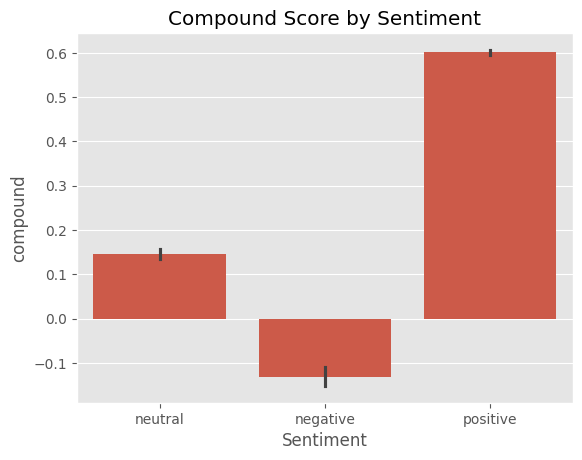

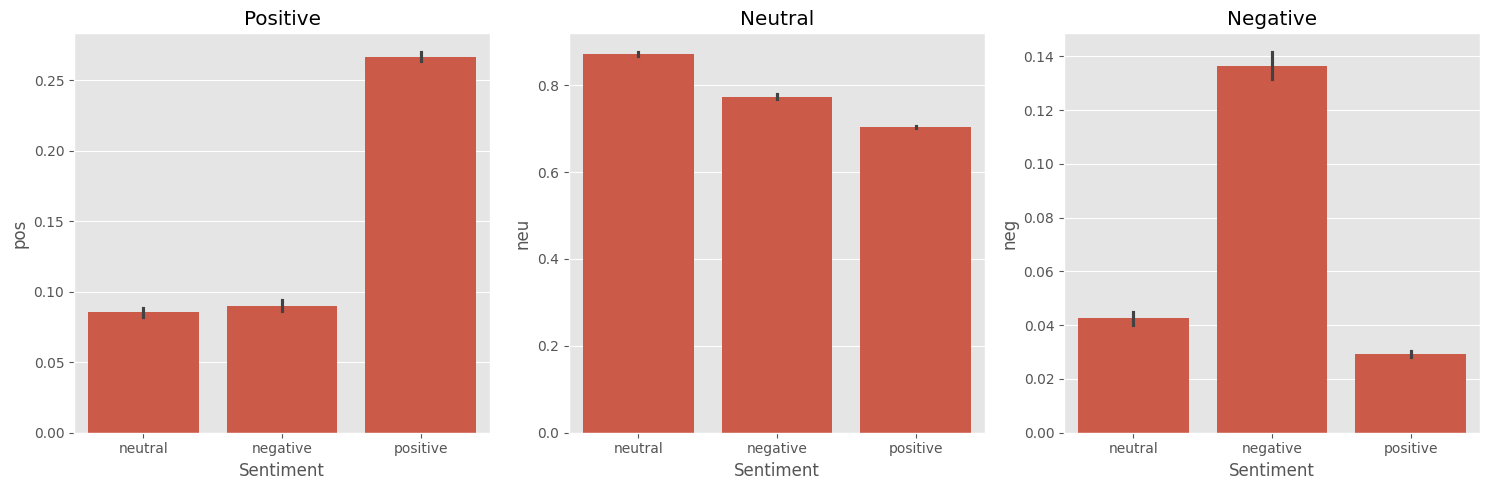

In [19]:
graph = sns.barplot(data=resdf, x='Sentiment', y='compound')
graph.set_title('Compound Score by Sentiment')

fig, graph = plt.subplots(1,3, figsize = (15,5))
sns.barplot(data=resdf, x='Sentiment', y='pos', ax=graph[0])
sns.barplot(data=resdf, x='Sentiment', y='neu', ax=graph[1])
sns.barplot(data=resdf, x='Sentiment', y='neg', ax=graph[2])
graph[0].set_title('Positive')
graph[1].set_title('Neutral')
graph[2].set_title('Negative')

plt.tight_layout()
plt.show()